In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
#Load the data
file_path = '/content/drive/MyDrive/Business_Automation_Task/Students_Performance_data_set.csv'
df = pd.read_csv(file_path)


In [43]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  University Admission year  Gender Age H.S.C passing year Program  \
0                      2018    Male  24               2016    BCSE   
1                      2021    Male  22               2020    BCSE   
2                      2020  Female  21               2019    BCSE   
3                      2021    Male  20               2020    BCSE   
4                      2021    Male  22               2019    BCSE   

  Current Semester Do you have meritorious scholarship ?  \
0               12                                   Yes   
1                4                                   Yes   
2                5                                    No   
3              4th                                   Yes   
4    4th-summer 22                                   Yes   

  Do you use University transportation? How many hour do you study daily?  \
0                                    No                                 3   
1                                

In [44]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 32 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   University Admission year                                                   1194 non-null   object 
 1   Gender                                                                      1194 non-null   object 
 2   Age                                                                         1193 non-null   object 
 3   H.S.C passing year                                                          1194 non-null   object 
 4   Program                                                                     1194 non-null   object 
 5   Current Semester                                                            1194 non-null   object 
 6   Do you hav

In [45]:
# Displaying summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
       target
count     0.0
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN


In [46]:
# Counting missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
University Admission year                                                        0
Gender                                                                           0
Age                                                                              1
H.S.C passing year                                                               0
Program                                                                          0
Current Semester                                                                 0
Do you have meritorious scholarship ?                                            0
Do you use University transportation?                                            5
How many hour do you study daily?                                                0
How many times do you seat for study in a day?                                   1
What is your preferable learning mode?                                           0
Do you use smart phone?                                

In [47]:
# Check for duplicate values
print("Duplicate rows in the dataset:")
print(df.duplicated().sum())

Duplicate rows in the dataset:
0


In [48]:
for column_name in df.columns:
    data_type = df[column_name].dtype
    print(f'Data Type of {column_name}: {data_type}')

Data Type of University Admission year: object
Data Type of Gender: object
Data Type of Age: object
Data Type of H.S.C passing year: object
Data Type of Program: object
Data Type of Current Semester: object
Data Type of Do you have meritorious scholarship ?: object
Data Type of Do you use University transportation?: object
Data Type of How many hour do you study daily?: object
Data Type of How many times do you seat for study in a day?: object
Data Type of What is your preferable learning mode?: object
Data Type of Do you use smart phone?: object
Data Type of Do you have personal Computer?: object
Data Type of How many hour do you spent daily in social media?: object
Data Type of Status of your English language proficiency: object
Data Type of Average attendance on class: object
Data Type of Did you ever fall in probation?: object
Data Type of Did you ever got suspension?: object
Data Type of Do you attend in teacher consultancy for any kind of academical problems? : object
Data Type o

In [49]:
for column_name in df.columns:
    unique_values = df[column_name].nunique()
    print(f'Unique values in {column_name}: {unique_values}')


Unique values in University Admission year: 27
Unique values in Gender: 2
Unique values in Age: 17
Unique values in H.S.C passing year: 38
Unique values in Program: 1
Unique values in Current Semester: 154
Unique values in Do you have meritorious scholarship ?: 2
Unique values in Do you use University transportation?: 2
Unique values in How many hour do you study daily?: 234
Unique values in How many times do you seat for study in a day?: 171
Unique values in What is your preferable learning mode?: 2
Unique values in Do you use smart phone?: 2
Unique values in Do you have personal Computer?: 2
Unique values in How many hour do you spent daily in social media?: 278
Unique values in Status of your English language proficiency: 3
Unique values in Average attendance on class: 157
Unique values in Did you ever fall in probation?: 2
Unique values in Did you ever got suspension?: 2
Unique values in Do you attend in teacher consultancy for any kind of academical problems? : 2
Unique values in 

In [50]:
# Impute missing values with the mode of each categorical column
categorical_columns = ['Do you use University transportation?', 'What is your preferable learning mode?']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [51]:
print(df.isnull().sum())

University Admission year                                                        0
Gender                                                                           0
Age                                                                              1
H.S.C passing year                                                               0
Program                                                                          0
Current Semester                                                                 0
Do you have meritorious scholarship ?                                            0
Do you use University transportation?                                            0
How many hour do you study daily?                                                0
How many times do you seat for study in a day?                                   1
What is your preferable learning mode?                                           0
Do you use smart phone?                                                          0
Do y

In [52]:
# Extract Numerical Values from these columns so that using these columns target column is created.
column = ['How many hour do you study daily?', 'How many hour do you spent daily in social media?', \
          'Average attendance on class', 'How many hour do you spent daily on your skill development?']

def parse_and_average(value):
    value = str(value)
    # print(value)
    numbers = []
    current_number = ""

    # Iterate through characters in the value
    for char in value:
        if char.isdigit():
            current_number += char
            if value.index(char) == len(value) - 1:
                numbers.append(float(current_number))

        elif char == '.' and value.index(char) < len(value) - 1:
            # Check if the next character is a digit for a fraction like '3.5'
            if  value[value.index(char) + 1].isdigit():
                current_number += char

        # print(current_number)
        elif current_number:
            numbers.append(float(current_number))
            current_number = ""

    # print(numbers)
    if numbers:
        return sum(numbers) / len(numbers)
    else:
        # print(value)
        return 0  # Return 0 if no numeric values are found


for column_name in column:
    df[column_name] = df[column_name].apply(parse_and_average)

    # Replace remaining non-numeric or null values or 0 with the mean
    mean_value = df[column_name].mean()
    df[column_name].fillna(mean_value, inplace=True)
    df[column_name].replace(0, mean_value, inplace=True)

    print(df[column_name])

0       3.0
1       3.0
2       3.0
3       1.0
4       3.5
       ... 
1189    1.0
1190    4.0
1191    3.0
1192    5.0
1193    3.0
Name: How many hour do you study daily?, Length: 1194, dtype: float64
0       5.0
1       2.5
2       3.0
3       2.0
4       2.0
       ... 
1189    2.0
1190    4.0
1191    2.0
1192    3.0
1193    5.0
Name: How many hour do you spent daily in social media?, Length: 1194, dtype: float64
0        90.000000
1        96.000000
2        80.000000
3        84.360796
4        80.000000
           ...    
1189     46.000000
1190    100.000000
1191    100.000000
1192    100.000000
1193    100.000000
Name: Average attendance on class, Length: 1194, dtype: float64
0       2.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
1189    2.0
1190    2.0
1191    2.0
1192    4.0
1193    1.0
Name: How many hour do you spent daily on your skill development?, Length: 1194, dtype: float64


In [53]:
column = ['How many times do you seat for study in a day?']

def parse_and_average(value):
    value = str(value)
    # print(value)
    numbers = []
    current_number = ""

    # Iterate through characters in the value
    for char in value:
        if char.isdigit():
            current_number += char
            if value.index(char) == len(value) - 1:
                numbers.append(float(current_number))

        elif char == '.' and value.index(char) < len(value) - 1:
            # Check if the next character is a digit for a fraction like '3.5'
            if  value[value.index(char) + 1].isdigit():
                current_number += char

        # print(current_number)
        elif current_number:
            numbers.append(float(current_number))
            current_number = ""

    # print(numbers)
    if numbers:
        return max(numbers)
    else:
        # print(value)
        return 0  # Return 0 if no numeric values are found


for column_name in column:
    df[column_name] = df[column_name].apply(parse_and_average)

    # Replace remaining non-numeric or null values or 0 with the mean
    mode_value = df[column_name].mode().iloc[0]
    df[column_name].fillna(mode_value, inplace=True)

    df[column_name].replace(0, mode_value, inplace=True)
    print(df[column_name])

0       2.0
1       2.0
2       3.0
3       4.0
4       1.0
       ... 
1189    2.0
1190    4.0
1191    3.0
1192    3.0
1193    2.0
Name: How many times do you seat for study in a day?, Length: 1194, dtype: float64


In [54]:
print(df.isnull().sum())
print(df.shape)

University Admission year                                                        0
Gender                                                                           0
Age                                                                              1
H.S.C passing year                                                               0
Program                                                                          0
Current Semester                                                                 0
Do you have meritorious scholarship ?                                            0
Do you use University transportation?                                            0
How many hour do you study daily?                                                0
How many times do you seat for study in a day?                                   0
What is your preferable learning mode?                                           0
Do you use smart phone?                                                          0
Do y

In [55]:
# Drop rows with missing values in specific columns
# I can do that because the number of occurances is small while number of rows is large

df = df.dropna(subset=['Are you engaged with any co-curriculum activities?', 'What was your previous SGPA?', 'Age',\
                       'What is your current CGPA?', 'How many Credit did you have completed?',\
                       'What is your monthly family income?', 'Are you engaged with any co-curriculum activities?',\
                       'How many hour do you spent daily on your skill development?', 'What is you interested area?',\
                       'What are the skills do you have ?', 'How many hour do you spent daily in social media?'])
print(df.shape)
print(df.isnull().sum())


(1032, 32)
University Admission year                                                        0
Gender                                                                           0
Age                                                                              0
H.S.C passing year                                                               0
Program                                                                          0
Current Semester                                                                 0
Do you have meritorious scholarship ?                                            0
Do you use University transportation?                                            0
How many hour do you study daily?                                                0
How many times do you seat for study in a day?                                   0
What is your preferable learning mode?                                           0
Do you use smart phone?                                                     

In [56]:
# Assuming 'your_column' is the column with mixed values
column = ['What was your previous SGPA?', 'What is your current CGPA?']

# Function to check and convert to float
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None  # Return None if the conversion is not possible

for column_name in column:

    df[column_name] = df[column_name].apply(convert_to_float)

    # Drop rows with NaN (resulting from unsuccessful conversion)
    df.dropna(subset=[column_name], inplace=True)
    print(df.shape)


(995, 32)
(968, 32)


<ipython-input-56-b4b3a1109955>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(convert_to_float)
<ipython-input-56-b4b3a1109955>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[column_name], inplace=True)
<ipython-input-56-b4b3a1109955>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

<ipython-input-57-69d37d1991bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')


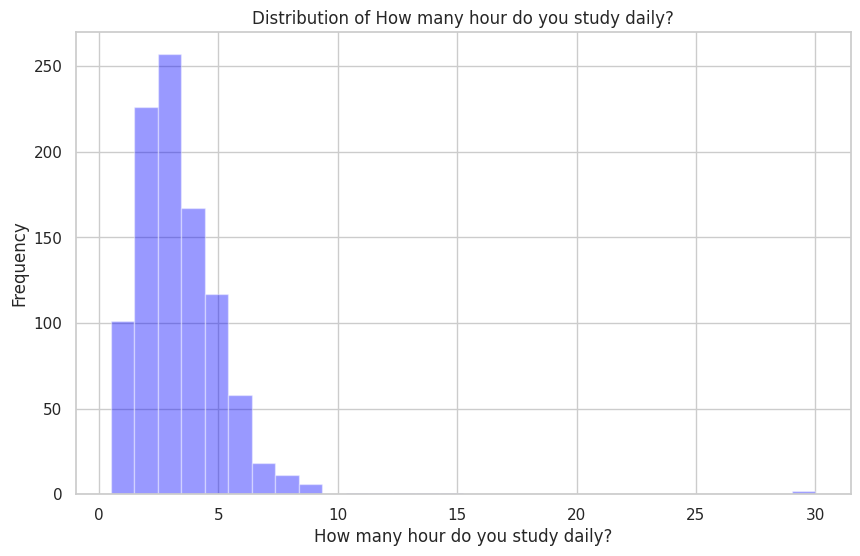

<ipython-input-57-69d37d1991bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')


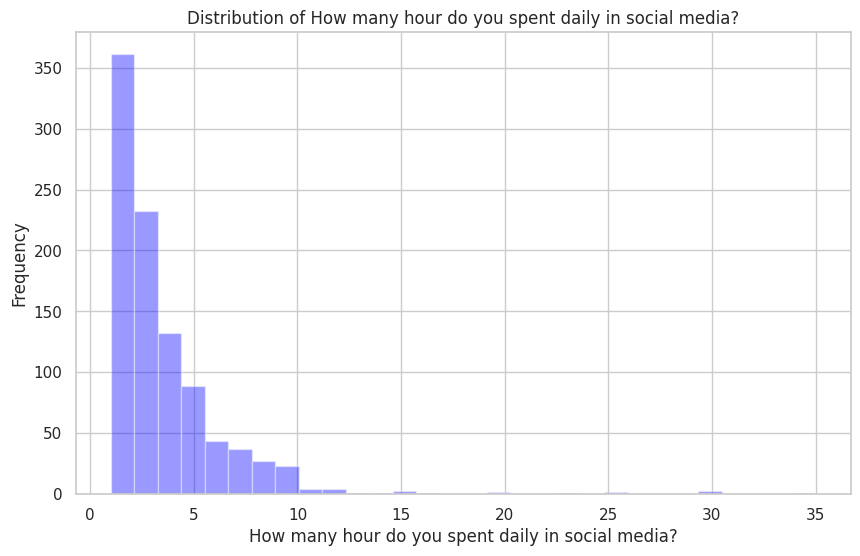

<ipython-input-57-69d37d1991bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')


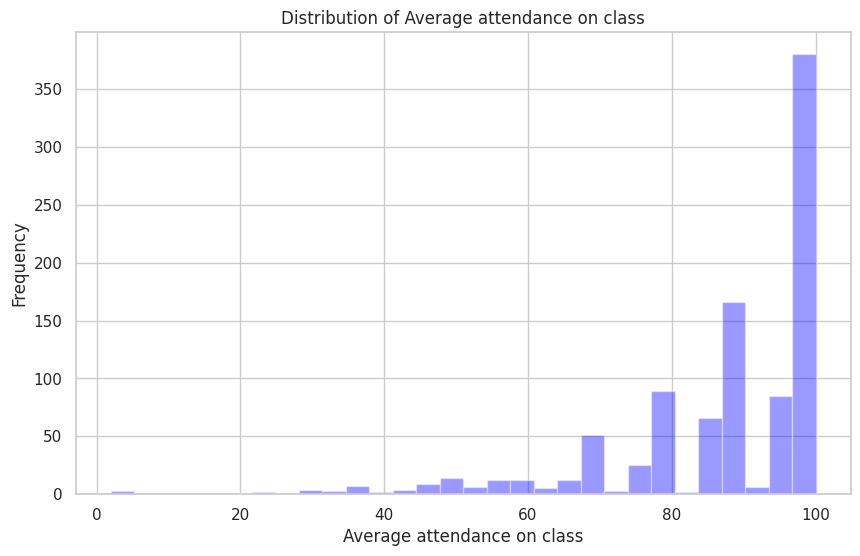

<ipython-input-57-69d37d1991bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')


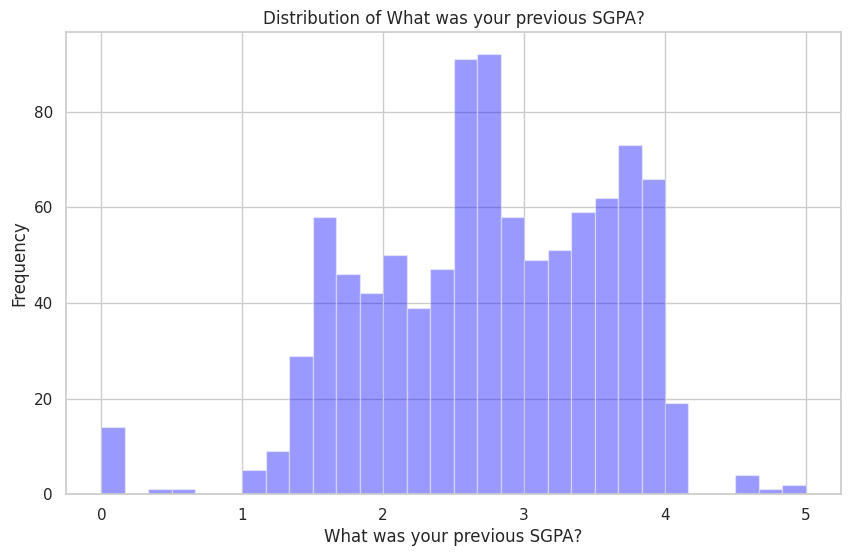

<ipython-input-57-69d37d1991bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')


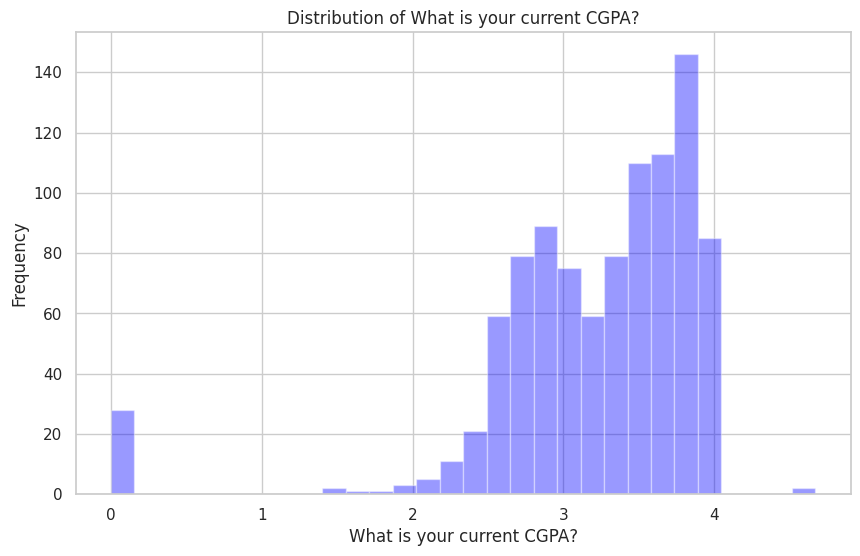

(968, 32)


In [57]:
column = ['How many hour do you study daily?', 'How many hour do you spent daily in social media?', 'Average attendance on class',\
          'What was your previous SGPA?', 'What is your current CGPA?']
for column_name in column:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create a distribution plot
    sns.distplot(df[column_name].dropna(), kde=False, bins=30, color='blue')

    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Distribution of {column}.jpg')

    plt.show()

print(df.shape)

In [58]:
column_names = df.columns
print("Column Names:", column_names)

Column Names: Index(['University Admission year', 'Gender', 'Age', 'H.S.C passing year',
       'Program', 'Current Semester', 'Do you have meritorious scholarship ?',
       'Do you use University transportation?',
       'How many hour do you study daily?',
       'How many times do you seat for study in a day?',
       'What is your preferable learning mode?', 'Do you use smart phone?',
       'Do you have personal Computer?',
       'How many hour do you spent daily in social media?',
       'Status of your English language proficiency',
       'Average attendance on class', 'Did you ever fall in probation?',
       'Did you ever got suspension?',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'What are the skills do you have ?',
       'How many hour do you spent daily on your skill development?',
       'What is you interested area?', 'What is your relationship status?',
       'Are you engaged with any co-curriculum activities?',
    

In [59]:
# Columns to delete
columns_to_delete = ['University Admission year','H.S.C passing year',
       'Current Semester',
       'What are the skills do you have ?',
       'What is you interested area?',
       'How many Credit did you have completed?',
       'What is your monthly family income?']

# Use the drop method to remove specified columns
df.drop(columns=columns_to_delete, inplace=True)
print(df)

      Gender Age Program Do you have meritorious scholarship ?  \
7     Female  22    BCSE                                   Yes   
11      Male  22    BCSE                                    No   
15      Male  20    BCSE                                   Yes   
18      Male  21    BCSE                                   Yes   
20    Female  21    BCSE                                   Yes   
...      ...  ..     ...                                   ...   
1189  Female  20    BCSE                                    No   
1190    Male  23    BCSE                                   Yes   
1191    Male  22    BCSE                                    No   
1192  Female  25    BCSE                                    No   
1193  Female  23    BCSE                                    No   

     Do you use University transportation?  How many hour do you study daily?  \
7                                       No                                2.0   
11                                      No   

In [60]:
import numpy as np

excellent_condition = (df['How many hour do you study daily?'] >= 3.0) & (df['What is your current CGPA?'] >= 3.75) & \
                      (df['What was your previous SGPA?'] >= 3.20) & (df['Average attendance on class'] >= 90.0) & \
                      (df['How many hour do you spent daily in social media?'] <= 3.0)

good_condition = (df['How many hour do you study daily?'] >= 2.0) & (df['What is your current CGPA?'] >= 3.20) & \
                 (df['What was your previous SGPA?'] >= 2.90) & (df['Average attendance on class'] >= 85.0) & \
                 (df['How many hour do you spent daily in social media?'] <= 4.0)

average_condition = (df['How many hour do you study daily?'] >= 1.0) & (df['What is your current CGPA?'] >= 2.80) & \
                    (df['What was your previous SGPA?'] >= 2.50) & (df['Average attendance on class'] >= 75.0) & \
                    (df['How many hour do you spent daily in social media?'] <= 5.0)

# Create the 'target' column based on conditions
df['target'] = np.select([excellent_condition, good_condition, average_condition], ['Excellent', 'Good', 'Average'], default='Poor')

In [61]:
# Convert the categorical column to numerical values automatically
column = ['Gender',
       'Program', 'Do you have meritorious scholarship ?',
       'Do you use University transportation?',
       'What is your preferable learning mode?', 'Do you use smart phone?',
       'Do you have personal Computer?',
       'Status of your English language proficiency',
       'Average attendance on class', 'Did you ever fall in probation?',
       'Did you ever got suspension?',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'What is your relationship status?',
       'Are you engaged with any co-curriculum activities?',
       'With whom you are living with?', 'Do you have any health issues?',
       'Do you have any physical disabilities?']

for categorical_column in column:
    df[categorical_column] = pd.Categorical(df[categorical_column]).codes


In [62]:
target_column = 'target'
# Define a mapping for conversion
mapping = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent':3}

# Use the replace method to replace values
df[target_column] = df[target_column].replace(mapping)


In [63]:
# Checking the class values
print(df['target'].iloc[4])
print(df['target'].iloc[5])
print(df['target'].iloc[6])
print(df['target'].iloc[7])

2
1
3
1


In [64]:
print(df)

      Gender Age  Program  Do you have meritorious scholarship ?  \
7          0  22        0                                      1   
11         1  22        0                                      0   
15         1  20        0                                      1   
18         1  21        0                                      1   
20         0  21        0                                      1   
...      ...  ..      ...                                    ...   
1189       0  20        0                                      0   
1190       1  23        0                                      1   
1191       1  22        0                                      0   
1192       0  25        0                                      0   
1193       0  23        0                                      0   

      Do you use University transportation?  \
7                                         0   
11                                        0   
15                                        

In [65]:
correlation_matrix = df.corrwith(df['target'])
# Display the correlation matrix
print(correlation_matrix)

Gender                                                                        0.055132
Program                                                                            NaN
Do you have meritorious scholarship ?                                         0.296171
Do you use University transportation?                                         0.040585
How many hour do you study daily?                                             0.152791
How many times do you seat for study in a day?                                0.067697
What is your preferable learning mode?                                       -0.119272
Do you use smart phone?                                                      -0.065100
Do you have personal Computer?                                                0.056273
How many hour do you spent daily in social media?                            -0.339289
Status of your English language proficiency                                   0.128423
Average attendance on class                

<ipython-input-65-ed379b124dd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df['target'])


<ipython-input-66-fea94f192d51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


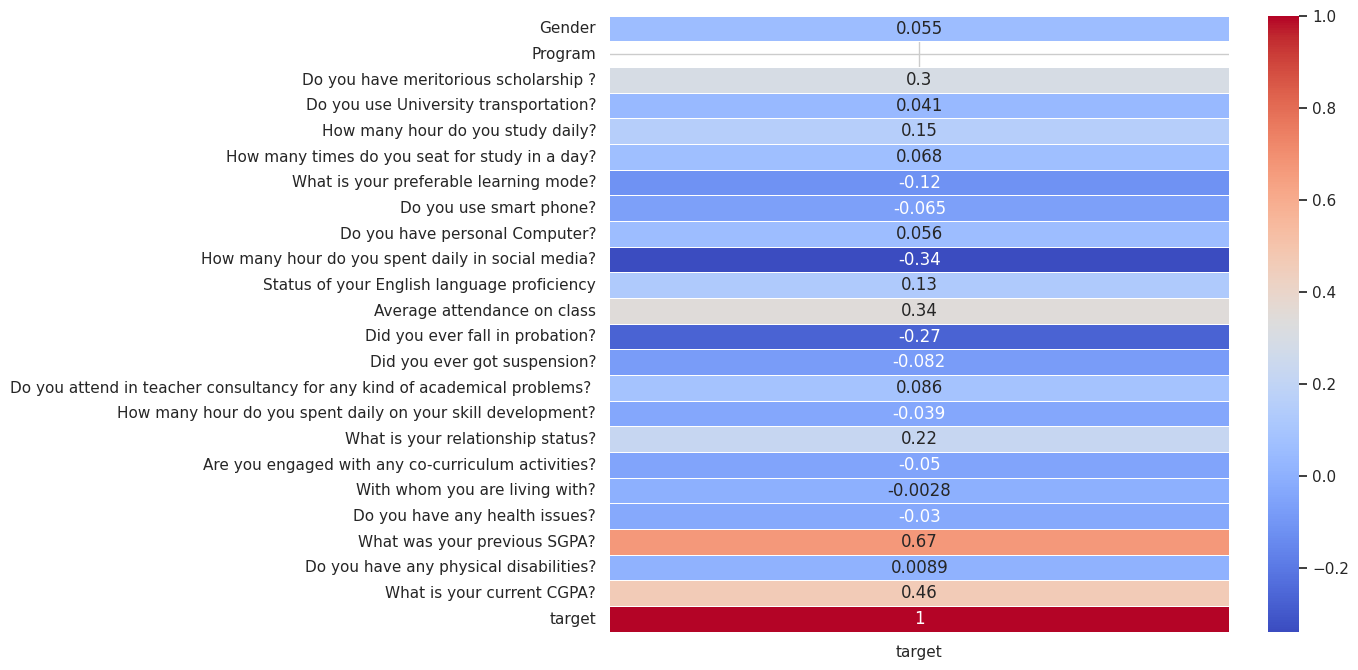

In [66]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [67]:
column_names = df.columns
print("Column Names:", column_names)
print(df.shape)

Column Names: Index(['Gender', 'Age', 'Program', 'Do you have meritorious scholarship ?',
       'Do you use University transportation?',
       'How many hour do you study daily?',
       'How many times do you seat for study in a day?',
       'What is your preferable learning mode?', 'Do you use smart phone?',
       'Do you have personal Computer?',
       'How many hour do you spent daily in social media?',
       'Status of your English language proficiency',
       'Average attendance on class', 'Did you ever fall in probation?',
       'Did you ever got suspension?',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'How many hour do you spent daily on your skill development?',
       'What is your relationship status?',
       'Are you engaged with any co-curriculum activities?',
       'With whom you are living with?', 'Do you have any health issues?',
       'What was your previous SGPA?',
       'Do you have any physical disabilitie

In [68]:
# Based on the corelation matrix, Delete the less important columns
columns_to_delete = ['Program', 'Gender', 'Age',
       'Do you use University transportation?',
       'How many times do you seat for study in a day?',
        'Do you use smart phone?',
       'Do you have personal Computer?',
       'Did you ever got suspension?',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'How many hour do you spent daily on your skill development?',
       'Are you engaged with any co-curriculum activities?',
       'With whom you are living with?', 'Do you have any health issues?',
       'Do you have any physical disabilities?']

df.drop(columns=columns_to_delete, inplace=True)
print(df.shape)

(968, 11)


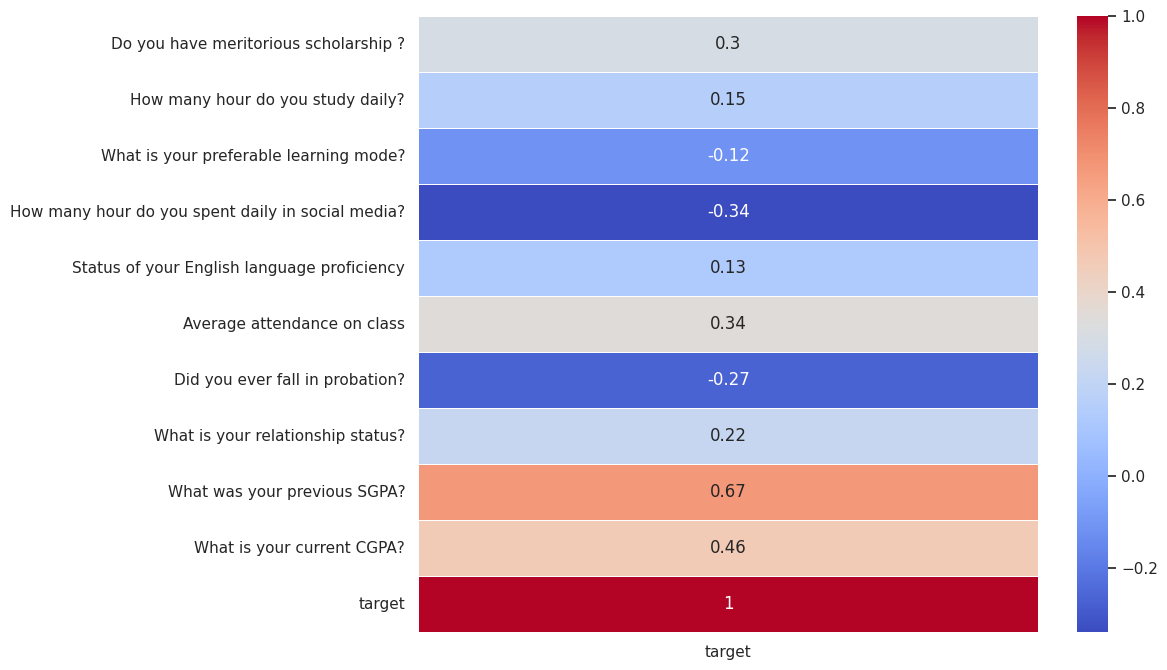

In [69]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', linewidths=.5)
plt.savefig("/content/drive/MyDrive/Business_Automation_Task/images/corr_matrix.jpg")
plt.show()

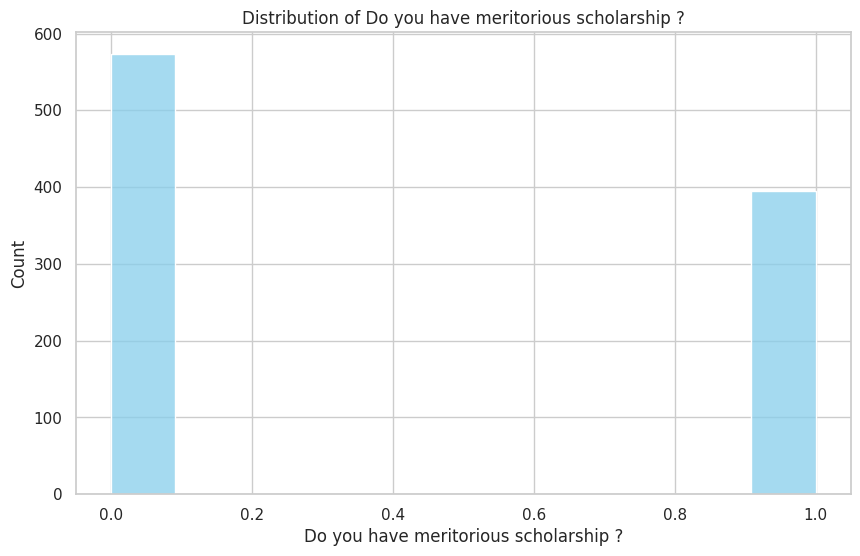

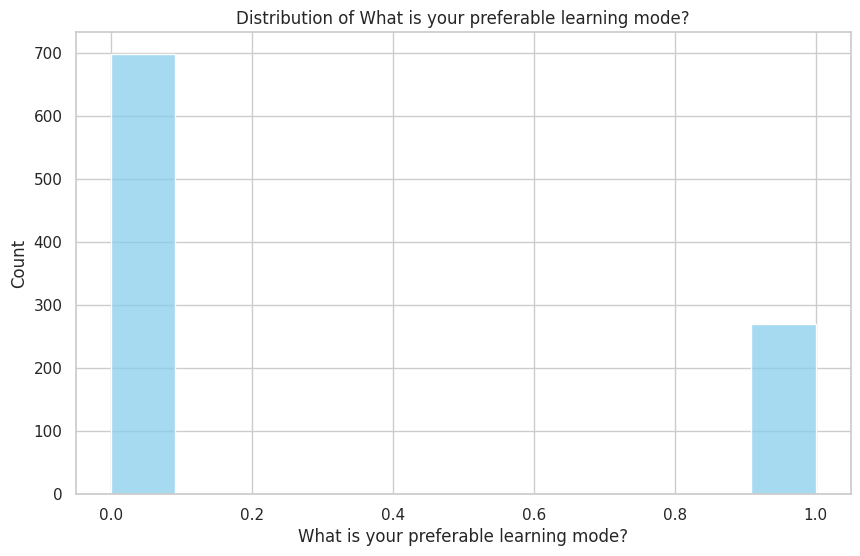

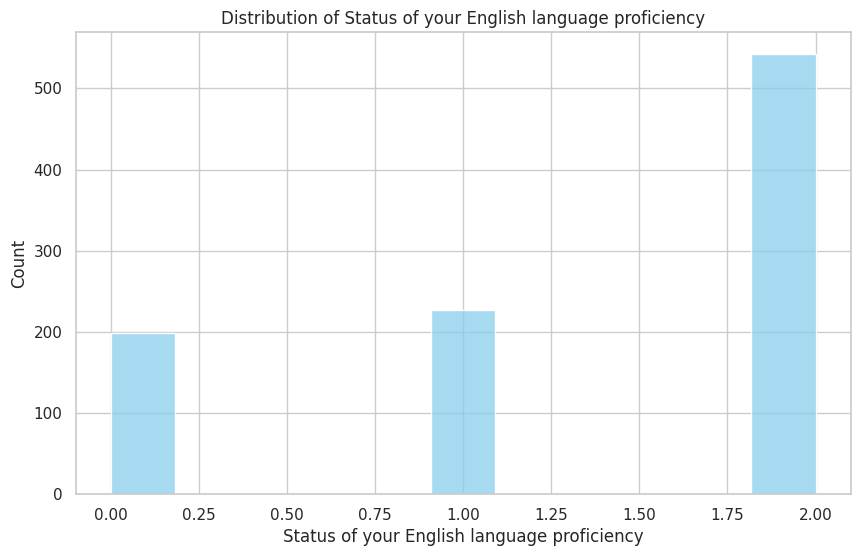

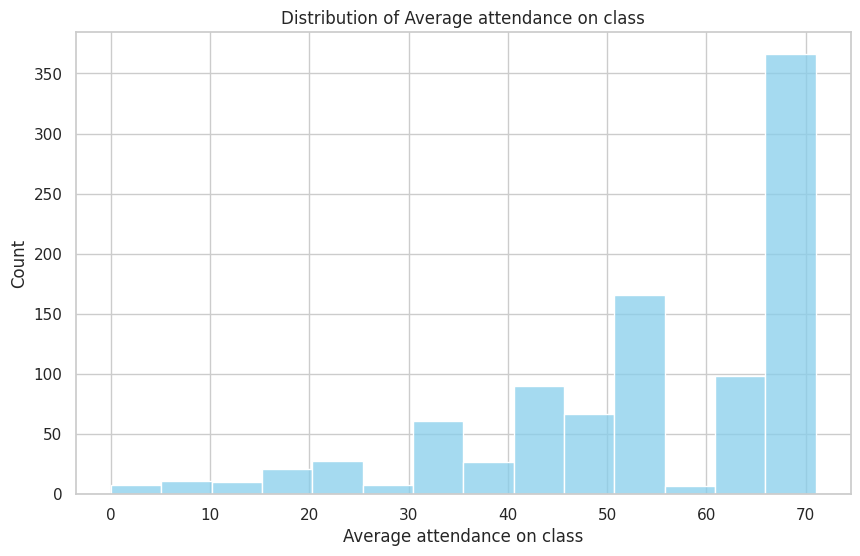

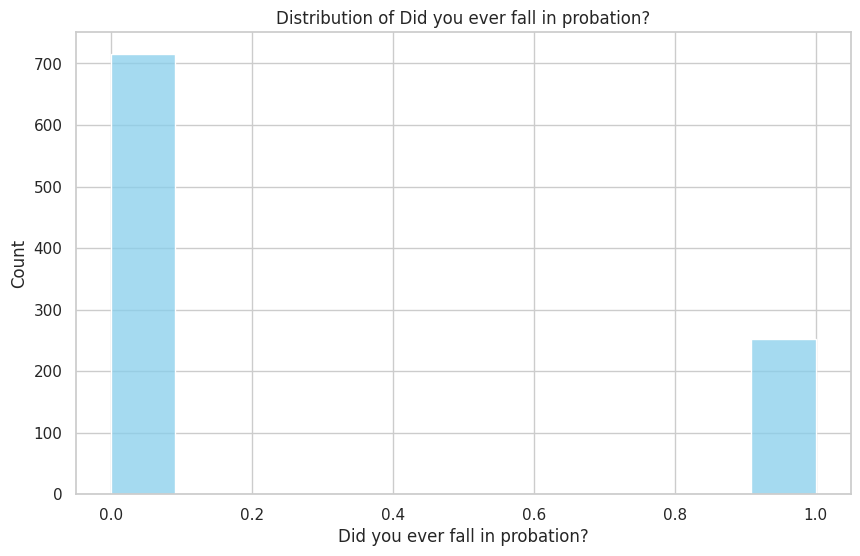

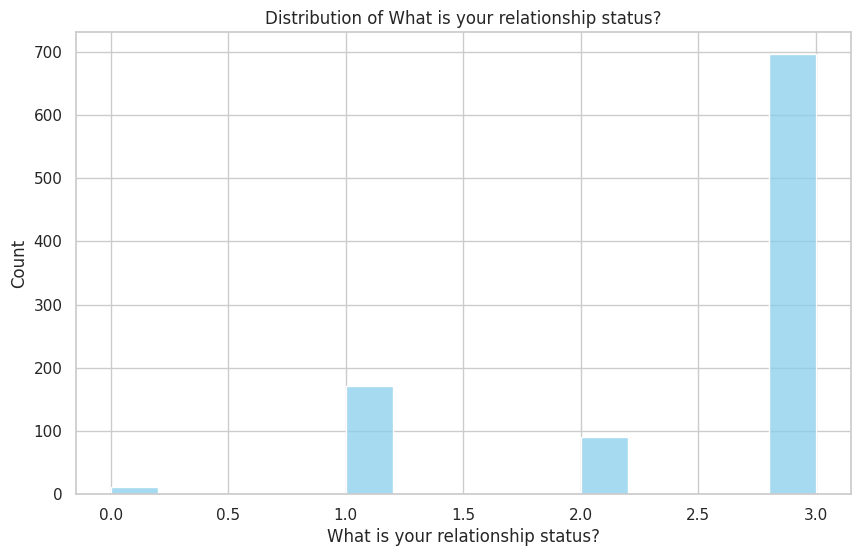

In [70]:
sns.set(style="whitegrid")

columns_of_interest = ['Do you have meritorious scholarship ?',
                        'What is your preferable learning mode?',
                        'Status of your English language proficiency',
                        'Average attendance on class',
                        'Did you ever fall in probation?',
                        'What is your relationship status?']

# Visualize each column separately
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=False, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Distribution_{column}.jpg')
    plt.show()


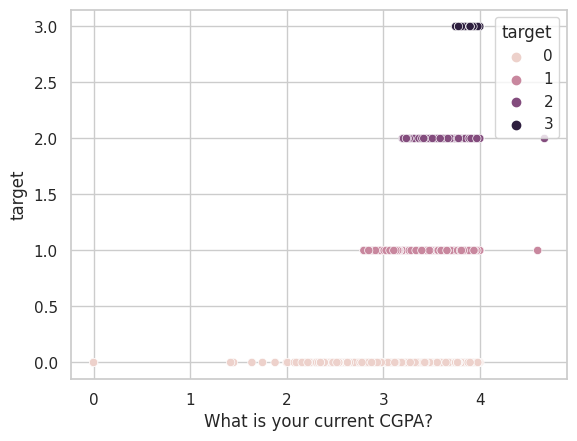

In [71]:
scatter_plot = sns.scatterplot(x=df['What is your current CGPA?'],y=df['target'],hue=df['target'])
scatter_plot.get_figure().savefig('/content/drive/MyDrive/Business_Automation_Task/images/scatter_plot_of_CGPA.jpg')
plt.show()

<Axes: xlabel='What was your previous SGPA?', ylabel='target'>

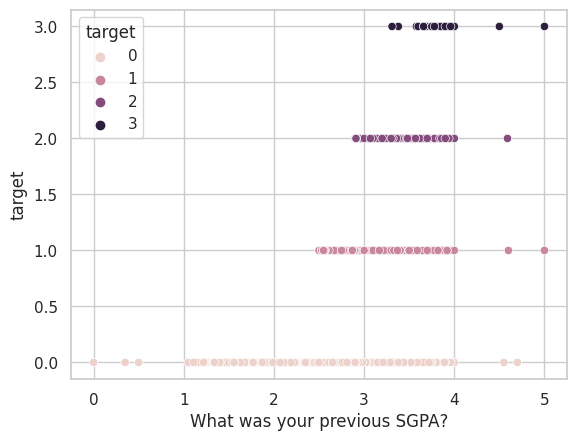

In [72]:
sns.scatterplot(x=df['What was your previous SGPA?'],y=df['target'],hue=df['target'])

In [73]:
df.shape

(968, 11)

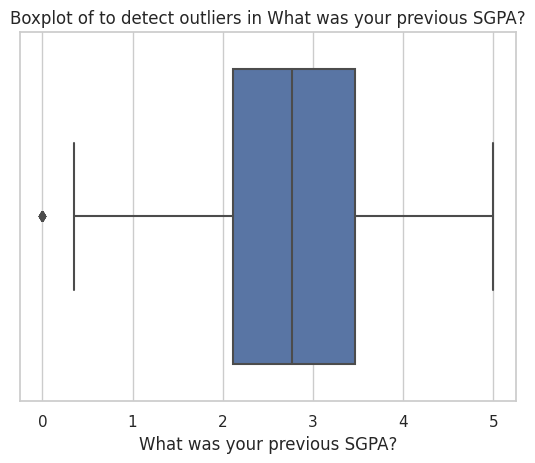

Lower Bound: 2.0, Upper Bound: 4.0


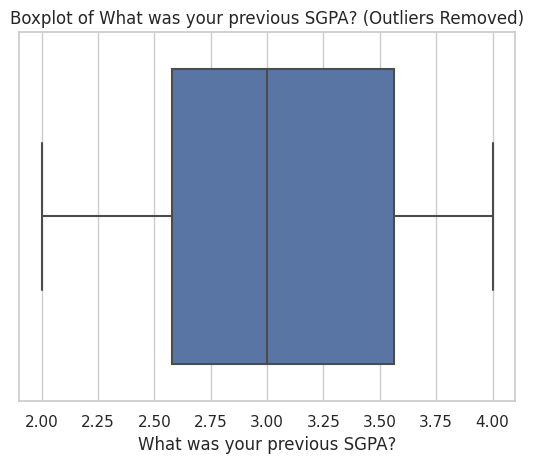

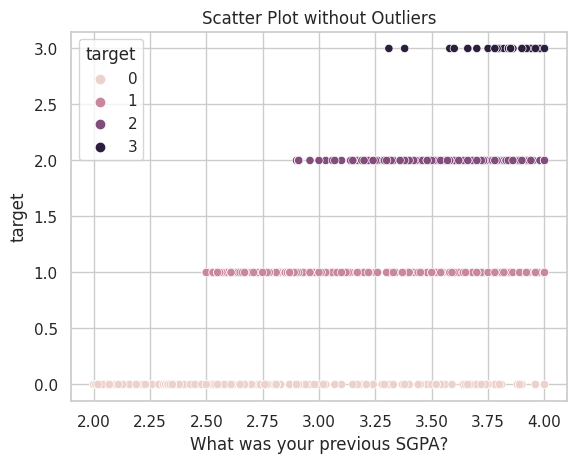

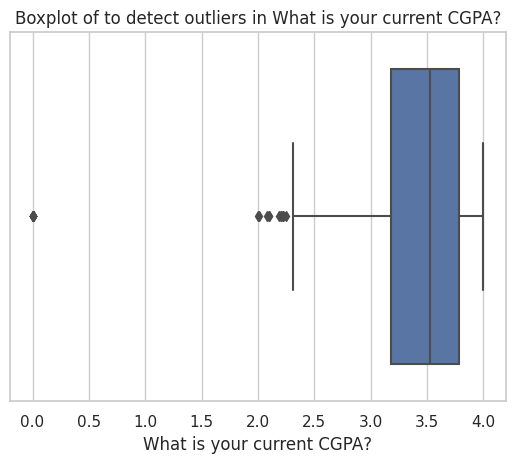

Lower Bound: 2.0, Upper Bound: 4.0


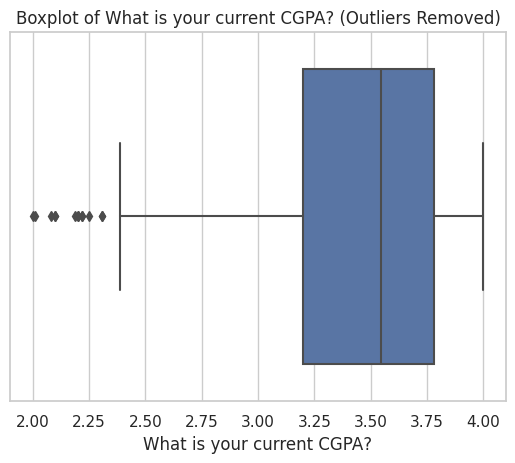

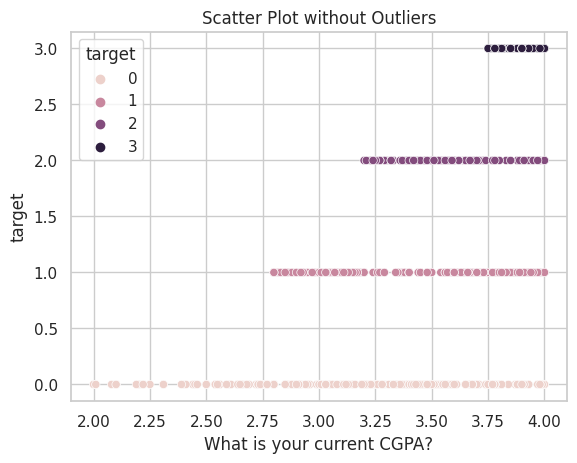

(742, 11)


In [74]:
columns_of_interest = ['What was your previous SGPA?', 'What is your current CGPA?']

# Removing Outliers
for column in columns_of_interest:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of to detect outliers in {column}')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Boxplot of {column} (With Outliers).jpg')

    plt.show()

    lower_bound = 2.0
    upper_bound = 4.0
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

    # Identify and remove outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df = df[~df.index.isin(outliers.index)]

    # Display the updated boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Boxplot of {column} (Outliers Removed).jpg')
    plt.show()

    # Create a scatter plot without outliers
    sns.scatterplot(x=df[column], y=df['target'], hue=df['target'])
    plt.title('Scatter Plot without Outliers')
    plt.show()

print(df.shape)

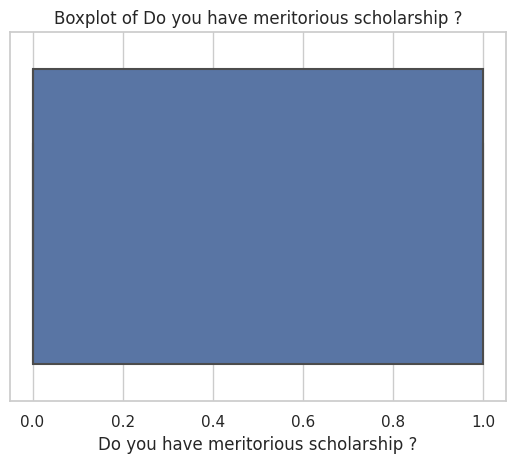

Lower Bound: -1.5, Upper Bound: 2.5


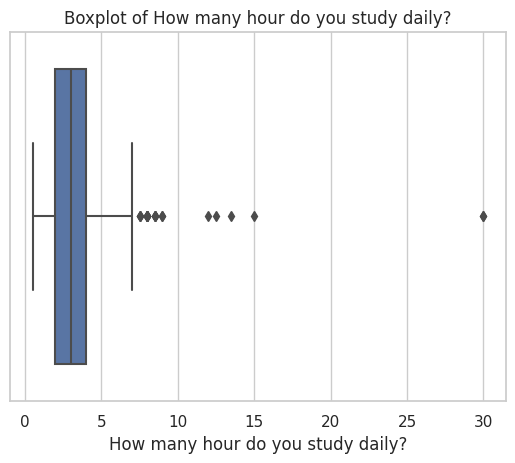

Lower Bound: -1.0, Upper Bound: 7.0


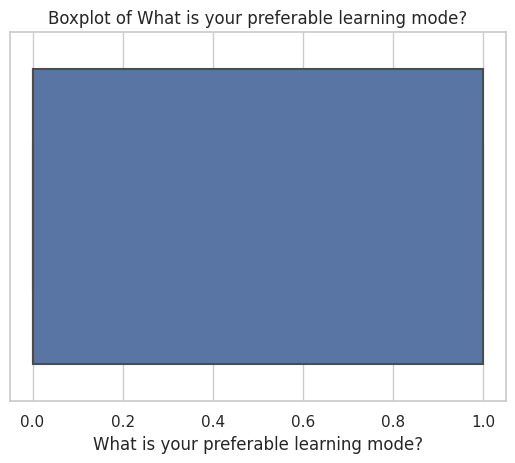

Lower Bound: -1.5, Upper Bound: 2.5


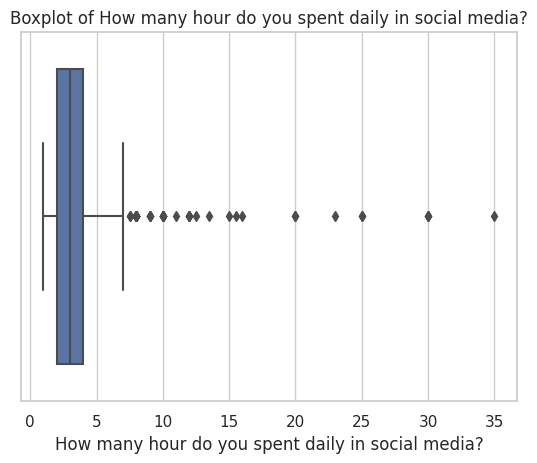

Lower Bound: -1.0, Upper Bound: 7.0


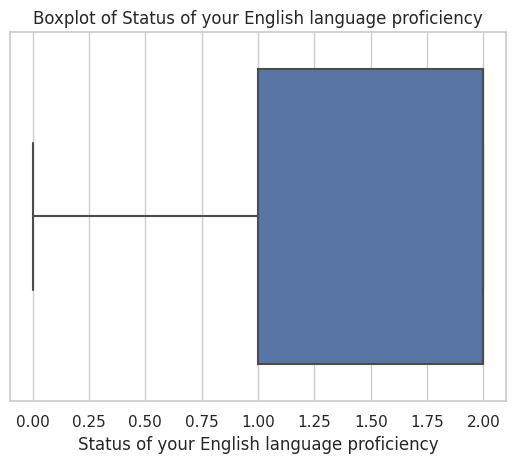

Lower Bound: -0.5, Upper Bound: 3.5


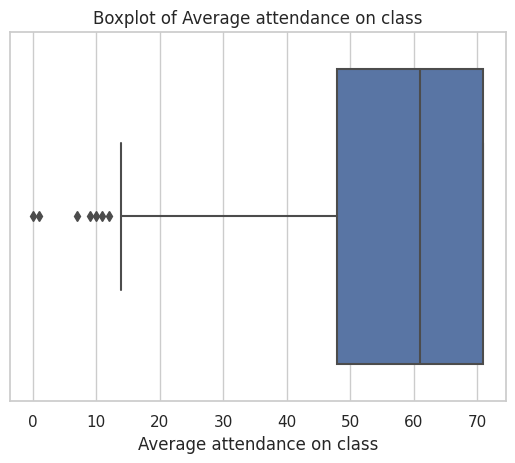

Lower Bound: 13.5, Upper Bound: 105.5


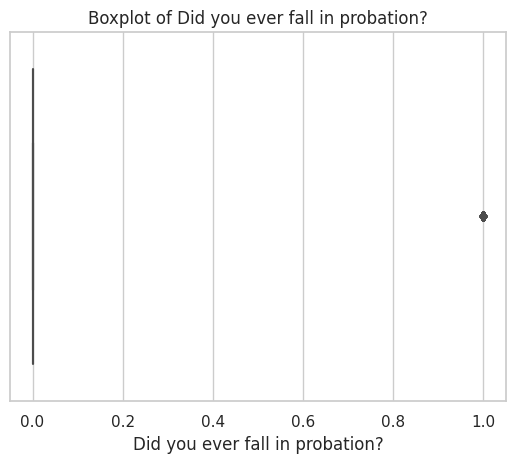

Lower Bound: 0.0, Upper Bound: 0.0


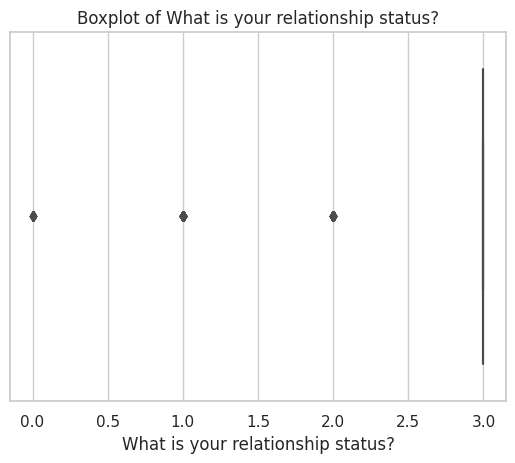

Lower Bound: 3.0, Upper Bound: 3.0


In [75]:
columns_of_interest = ['Do you have meritorious scholarship ?',
       'How many hour do you study daily?',
       'What is your preferable learning mode?',
       'How many hour do you spent daily in social media?',
       'Status of your English language proficiency',
       'Average attendance on class', 'Did you ever fall in probation?',
       'What is your relationship status?']

# Check for outliers
for column in columns_of_interest:
    # Display the updated boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Boxplot of {column} (With Outliers).jpg')

    plt.show()

    # Calculate quartiles and interquartile range (IQR)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: 2.0, Upper Bound: 8.0


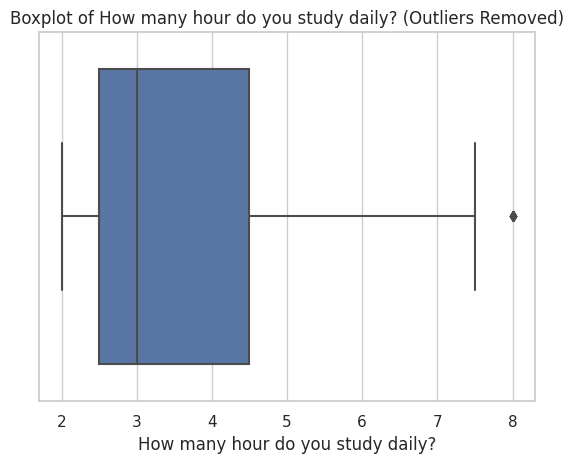

Lower Bound: 2.0, Upper Bound: 8.0


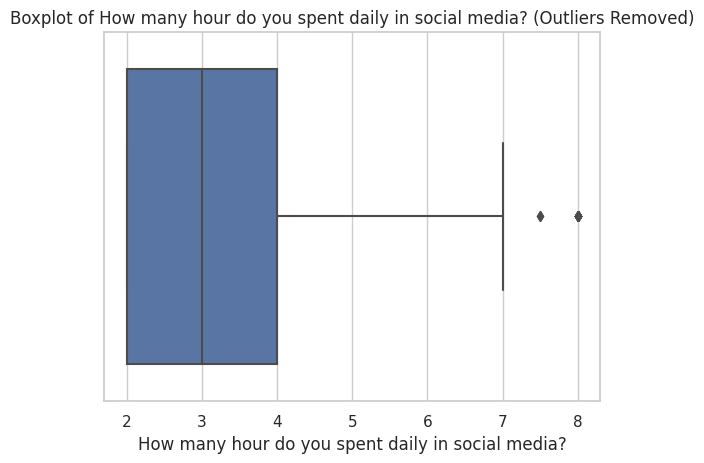

(512, 11)


In [76]:
columns_of_interest = ['How many hour do you study daily?','How many hour do you spent daily in social media?']

# Removing Outliers
for column in columns_of_interest:
    lower_bound = 2.0
    upper_bound = 8.0
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

    # Identify and remove outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df = df[~df.index.isin(outliers.index)]

    # Display the updated boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.savefig(f'/content/drive/MyDrive/Business_Automation_Task/images/Boxplot of {column} (Outliers Removed).jpg')
    plt.show()

print(df.shape)

Lower Bound: 30.0, Upper Bound: 100.0


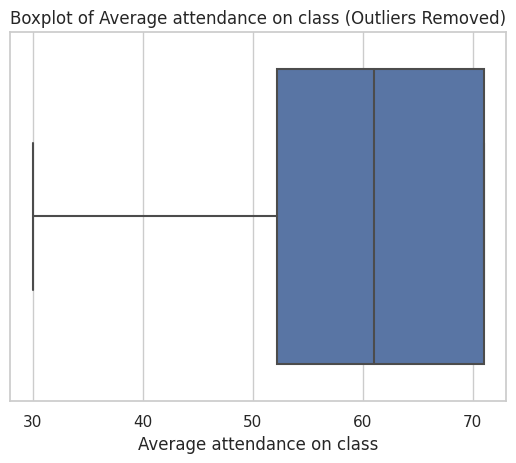

(486, 11)


In [77]:
columns_of_interest = ['Average attendance on class']
# Removing Outliers
for column in columns_of_interest:
    lower_bound = 30.0
    upper_bound = 100.0
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

    # Identify and remove outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df = df[~df.index.isin(outliers.index)]

    # Display the updated boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.show()

print(df.shape)

In [78]:
# Save the DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Business_Automation_Task/new_preprocessed_data.csv', index=False)